# Introduction

This notebook shows the full exploration of a single city graph, following https://www.gispo.fi/en/blog/analysing-urban-walkability-using-openstreetmap-and-python/. 

In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import networkx as nx
import osmnx as ox

All graph are extracted using OSMnx on 'scripts/create_graphs.py' on polygons from 'data/raw'. See 'data/raw/00_source.txt' for more details on the methodology used and the source for each polygon.

In [2]:
G = ox.load_graphml("../data/processed/graphs/Kozani.graphml")

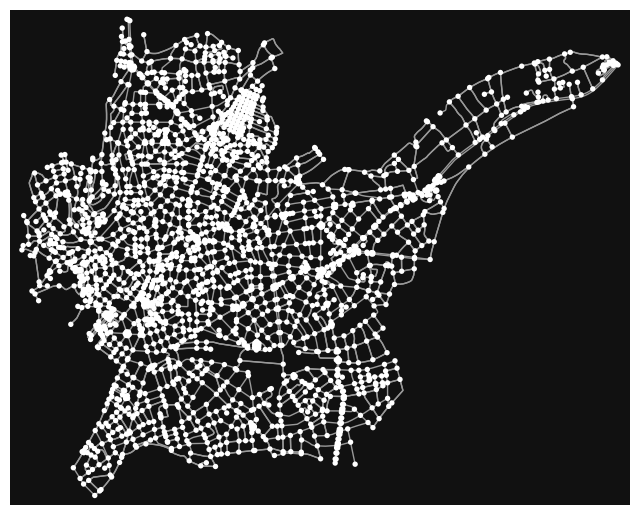

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [3]:
ox.plot_graph(G)

## Intersection density

In our simplified graph each node is an intersection. Intersection density is correlated with walking as a mode of transport.

The analysis is constrained by the complexity of the graph. If data in OSM on that city is very granular, each road can be its own edge, creating a lot of nodes at a single intersection. Because automatic topological simplification of graphs is a very hard and non-resolved task, we need to work with a more or less complex graph.

In [4]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G, nodes=True, edges=True)

(21.770725866010125, 21.823571533989877, 40.282774265433005, 40.316452734567)

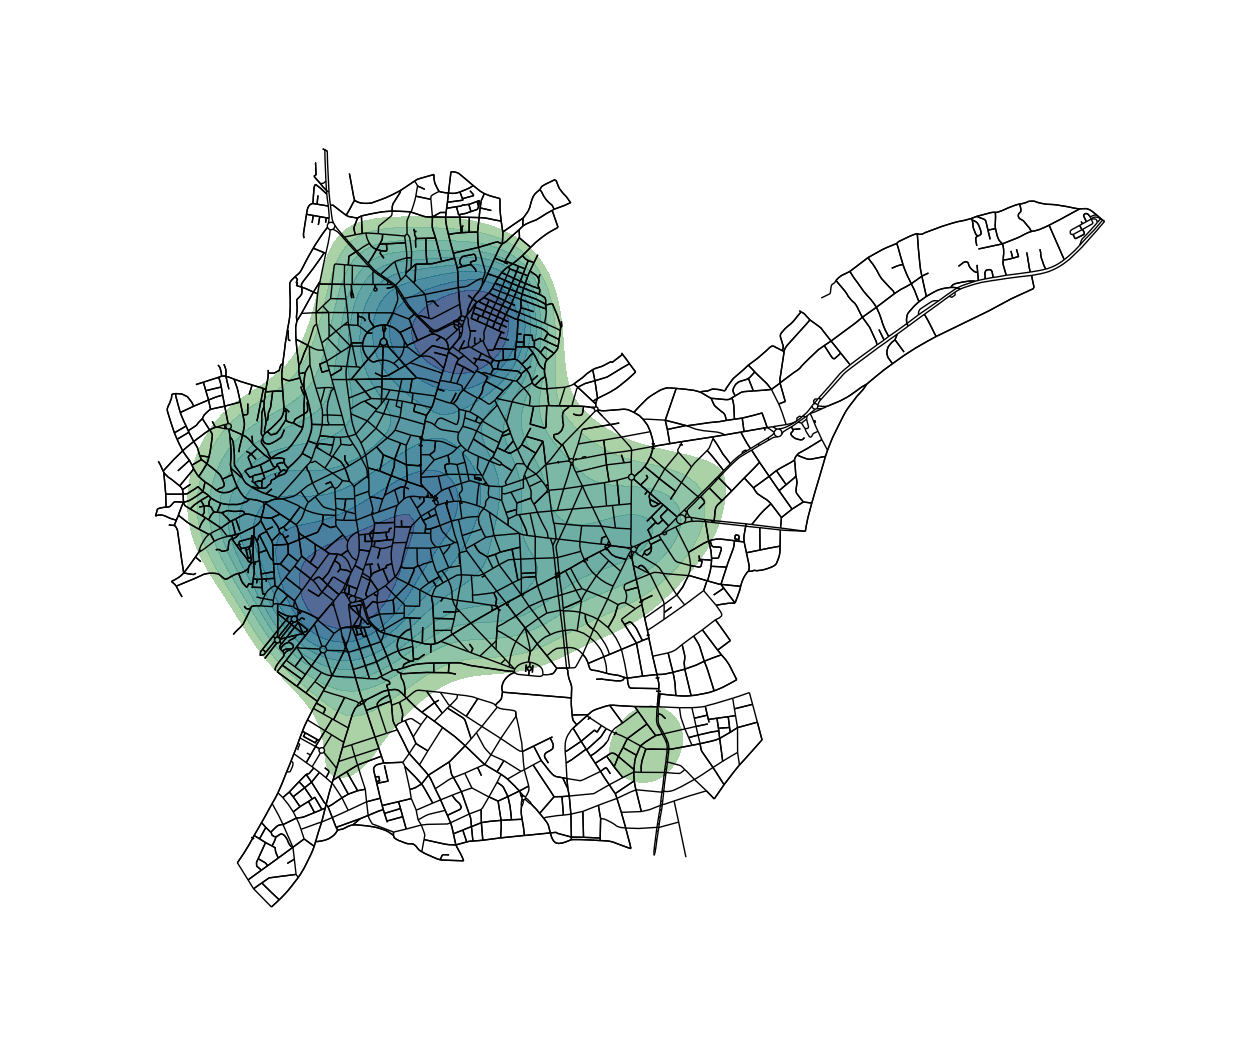

In [5]:
fig, ax = plt.subplots(figsize=(16, 16))
gdf_edges.plot(color="black", ax=ax, linewidth=1)
sns.kdeplot(
    gdf_nodes, x="x", y="y", fill=True, cmap="crest", thresh=0.4, alpha=0.8, ax=ax
)
ax.axis("off")

## Average time to travel in the entire city

Because we care about the time it takes to move, we compute instead of the average distance the average time for both slow and fast walkers.

In [9]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G, nodes=True, edges=True)

We create bins based on symbolic timing that are relevant: 15, 30, 60 minutes and higher.

In [10]:
bins_slow = [15, 30, 60]
minval = min(nx.get_edge_attributes(G, "avg_time_slow").values())
maxval = max(nx.get_edge_attributes(G, "avg_time_slow").values())
if minval > bins_slow[0]:
    bins_slow.remove(bins_slow[0])

In [11]:
# cmap = mpl.colors.LinearSegmentedColormap.from_list("", ["#31a354", "#a1d99b", "#e5f5e0", "lightgray"])
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    "", ["#b2df8a", "#a6cee3", "#1f78b4", "black"]
)

(21.77490285, 21.819394550000002, 40.28606073, 40.31316627)

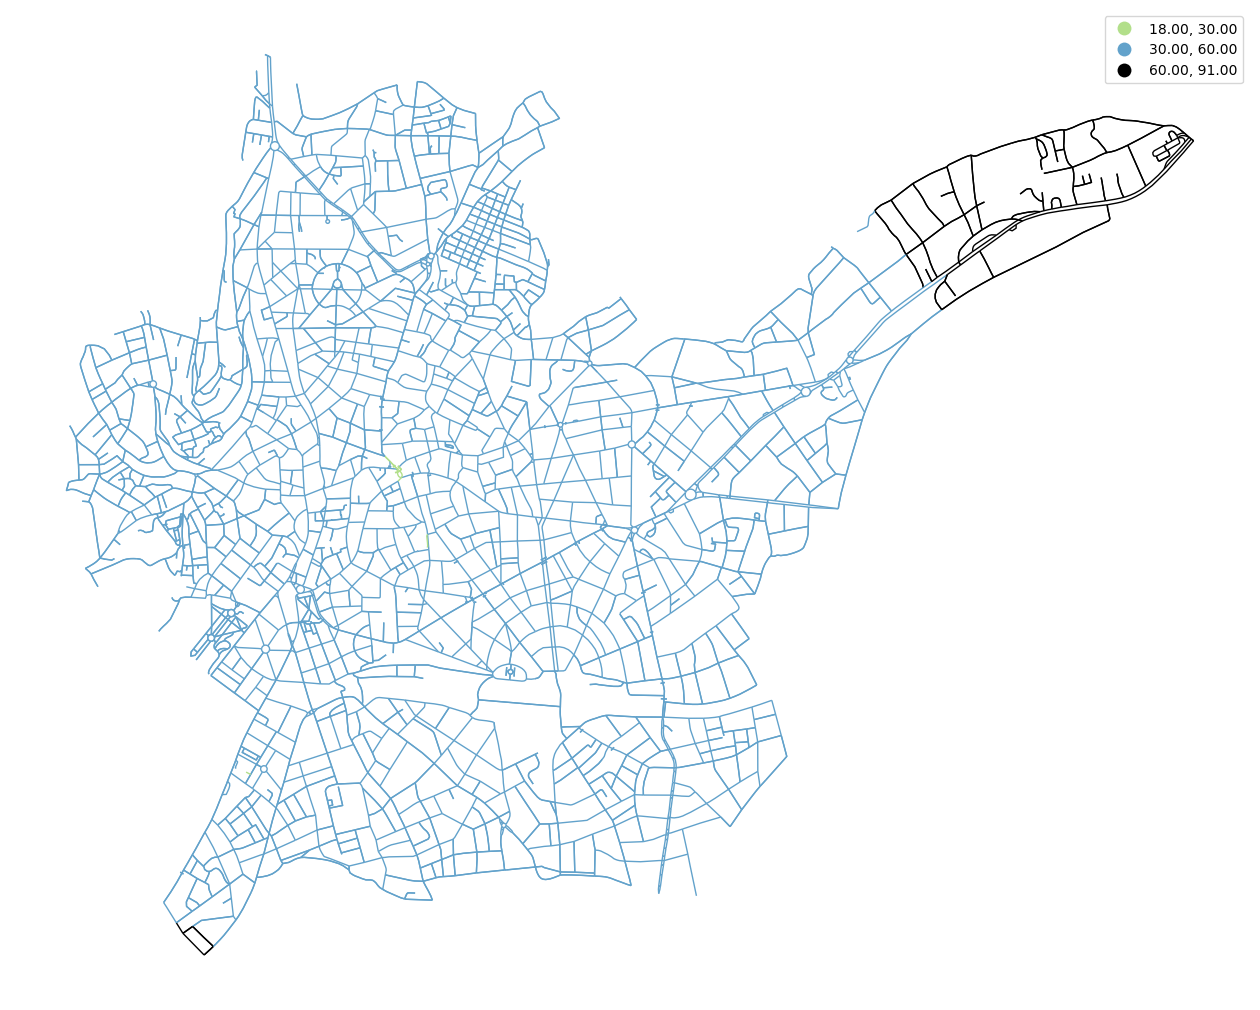

In [12]:
fig, ax = plt.subplots(figsize=(16, 16))
gdf_edges.plot(
    column="avg_time_slow",
    scheme="user_defined",
    classification_kwds={"bins": bins_slow},
    cmap=cmap,
    ax=ax,
    linewidth=1,
    legend=True,
)
ax.axis("off")

In [13]:
bins_fast = [15, 30, 60]

(21.77490285, 21.819394550000002, 40.28606073, 40.31316627)

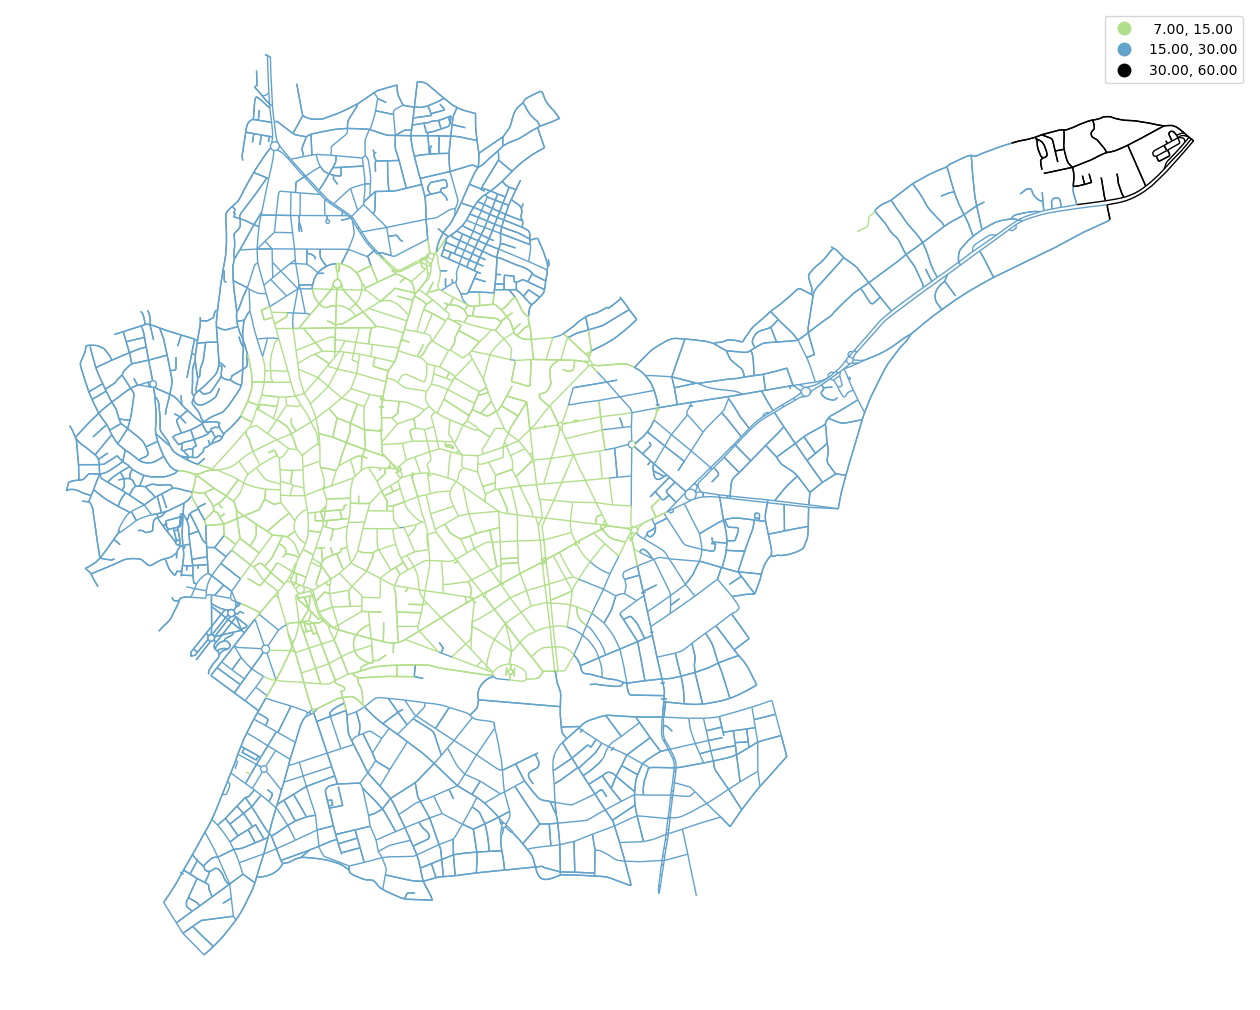

In [14]:
fig, ax = plt.subplots(figsize=(16, 16))
gdf_edges.plot(
    column="avg_time_fast",
    scheme="user_defined",
    classification_kwds={"bins": bins_fast},
    cmap=cmap,
    ax=ax,
    linewidth=1,
    legend=True,
)
ax.axis("off")

## Time to travel to different kinds of amenities

## Fragmentation and time to travel without being able to climb steep streets